In [1]:
import pandas
df = pandas.read_csv('data.csv')

In [4]:
X = df.drop('Activity', 1)
y = df['Activity']

In [7]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                      test_size=0.8, 
                                      random_state=241)

In [23]:
%matplotlib inline

      Iter       Train Loss   Remaining Time 
         1           1.2613           19.62s
         2           1.1715           18.99s
         3           1.1009           19.25s
         4           1.0529           18.86s
         5           1.0130           18.60s
         6           0.9740           18.55s
         7           0.9475           17.61s
         8           0.9197           17.55s
         9           0.8979           16.92s
        10           0.8730           16.87s
        20           0.7207           14.40s
        30           0.6055           13.15s
        40           0.5244           12.23s
        50           0.4501           11.67s
        60           0.3908           10.95s
        70           0.3372           10.37s
        80           0.3009            9.75s
        90           0.2603            9.19s
       100           0.2327            8.57s
       200           0.0835            2.81s
(0.53043981973526533, 36)


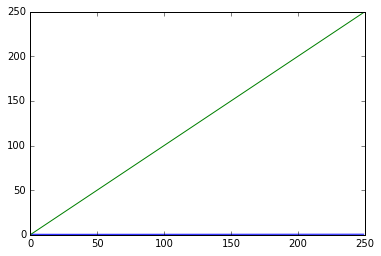

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt

import math
#for learning_rate in [1, 0.5, 0.3, 0.2, 0.1]:
for learning_rate in [0.2]:
    boosting = GradientBoostingClassifier(n_estimators=250, verbose=True, random_state=241, learning_rate=learning_rate)
    boosting.fit(X_train, y_train)
    test_score = []
    for i, pred in enumerate(boosting.staged_decision_function(X_test)):
        pred1 = map(lambda x : 1.0 / (1 + math.exp(-x)), pred)
        test_score.append((log_loss(y_test, pred1), i))
    print(min(test_score))
    plt.plot(test_score)

In [88]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(n_estimators=37, verbose=True, random_state=241)
forest.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    0.1s finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=37, n_jobs=1,
            oob_score=False, random_state=241, verbose=True,
            warm_start=False)

In [89]:
import sklearn
forest_pred = forest.predict_proba(X_test)
forest_pred = forest_pred[:,1]
forest_loss = log_loss(y_test, forest_pred)
print(forest_loss)

0.540911909937


[Parallel(n_jobs=1)]: Done  37 out of  37 | elapsed:    0.0s finished
